## 图a

In [1]:
ori_dic=[('[BOS]', -11.237125396728516), ('▁This', -11.858711242675781), ('▁will', -10.11039924621582), ('▁reduce', -12.407003402709961), ('▁the', -8.879886627197266), ('▁poll', -12.396705627441406), ('ution', -13.708147048950195), ('▁caused', -11.314926147460938), ('▁by', -10.547585487365723), ('▁the', -9.66524887084961), ('▁car', -11.1733980178833), ('b', -18.31064224243164), ('ones', -13.203455924987793), ('▁from', -10.53235912322998), ('▁the', -8.116357803344727), ('▁cars', -9.48948860168457), ('▁.', -6.343552589416504), ('[EOS]', -4.968552589416504)]
cor_dic=[('[BOS]', -11.227346420288086), ('▁This', -11.81181812286377), ('▁will', -10.044952392578125), ('▁reduce', -12.417708396911621), ('▁the', -8.851263999938965), ('▁poll', -12.475783348083496), ('ution', -13.632890701293945), ('▁caused', -11.289347648620605), ('▁by', -10.46395492553711), ('▁the', -9.693716049194336), ('▁car', -11.415257453918457), ('▁b', -9.925092697143555), ('ones', -13.010881423950195), ('▁from', -9.179254531860352), ('▁the', -8.306880950927734), ('▁cars', -8.226369857788086), ('.', -8.616849899291992), ('[EOS]', -5.246244430541992)]

In [2]:
data = []
text = []

# 处理 ori_dic
temp_1 = []
temp_2 = []
for item in ori_dic:
    temp_1.append(item[1])
    temp_2.append(item[0])

data.append(temp_1)
text.append(temp_2)

# 处理 cor_dic
temp_1 = []  # 重新定义 temp_1 为新的空列表
temp_2 = []  # 重新定义 temp_2 为新的空列表
for item in cor_dic:
    temp_1.append(item[1])
    temp_2.append(item[0])

data.append(temp_1)
text.append(temp_2)

/tmp/ipykernel_221598/3944041512.py:50: UserWarning: Glyph 9601 (\N{LOWER ONE EIGHTH BLOCK}) missing from font(s) Times New Roman.
  plt.savefig('./plot_1_400dpi.jpg', bbox_inches='tight', dpi=400)
/tmp/ipykernel_221598/3944041512.py:50: UserWarning: Glyph 9601 (\N{LOWER ONE EIGHTH BLOCK}) missing from font(s) Times New Roman.
  plt.savefig('./plot_1_400dpi.jpg', bbox_inches='tight', dpi=400)
/home/liujunhui/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9601 (\N{LOWER ONE EIGHTH BLOCK}) missing from font(s) Times New Roman.
  fig.canvas.print_figure(bytes_io, **kw)


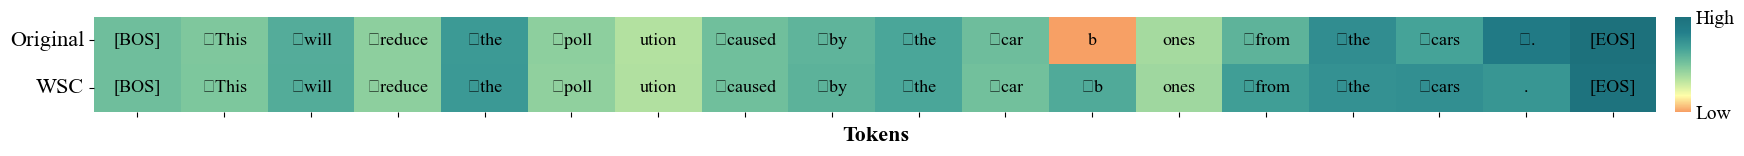

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec

plt.rcParams['font.family'] = 'Times New Roman'

fig, ax1 = plt.subplots(figsize=(24, 2 * 0.618))

clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298", "#237f8b", "#1D717C"]
newcmp = LinearSegmentedColormap.from_list('chaos', clist)

data_array = np.array(data)

cax = sns.heatmap(
    data_array,
    ax=ax1,
    cmap=newcmp,
    annot=False,       # 不显示每个格子的值
    cbar_kws={"pad": 0.01, "shrink": 1, "aspect": 6}  # 颜色条的大小
)

# 设置颜色条
cbar = cax.collections[0].colorbar
vmin, vmax = data_array.min(), data_array.max()
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['Low', 'High'])
cbar.ax.tick_params(labelsize=14, size=0)
# cbar.set_label("Likelihood", labelpad=-16, size=16)

# 在格子中添加文本
for i in range(data_array.shape[0]):
    tokens = text[0] if i == 0 else text[1]
    for j in range(data_array.shape[1]):
        ax1.text(j + 0.5, i + 0.5, tokens[j], ha="center", va="center", color="black", fontsize=13)

# 设置坐标轴标签
ax1.set_xlabel('Tokens', fontsize=16, fontdict={'weight': 'bold'})
ax1.tick_params(axis='x', labelsize=16)
# 清除 x 轴标签
ax1.set_xticklabels([])

# 设置 y 轴刻度和标签
row_labels = ['Original', 'WSC']
ax1.set_yticks(np.arange(len(row_labels)) + 0.5)  # 设置y轴的刻度位置
ax1.set_yticklabels(row_labels, fontsize=16, rotation=0)  # y轴标签并旋转为水平

# 保存图形
plt.savefig('./plot_1_400dpi.jpg', bbox_inches='tight', dpi=400)
# plt.savefig('./plot_1_300dpi.png', bbox_inches='tight', dpi=300)
# plt.savefig('./plot_1_300dpi.tiff', bbox_inches='tight', dpi=300)
# plt.savefig('./plot_1_300dpi.svg', bbox_inches='tight', dpi=300)

# 显示图形
plt.show()


## 图b

In [4]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from seaborn import colors
import shap
import matplotlib.ticker as mticker
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

pl.rcParams['font.family'] = 'Times New Roman'

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [5]:
cols = [2, 3, 4, 5, 6, 7]
cols_name = ['semantic similarity', 'fluency', 'toxicity', 'Shannon entropy', 'perplexity','semantic entropy']
df = pd.read_excel("jfleg_data_all.xlsx", usecols=cols)

# 提取 'semantic_similarity' 列
semantic_similarity = df[['semantic similarity']]

# 对其他列进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.drop(columns=['semantic similarity']))
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[:-1])  # 除去 'semantic_similarity' 后的列名

# 将 'semantic_similarity' 列合并回去
df_scaled = pd.concat([semantic_similarity.reset_index(drop=True), df_scaled], axis=1)

# 选择所需列
data = df_scaled[cols_name]
data.head()

# 选择特征
cols = ['fluency', 'toxicity', 'Shannon entropy','perplexity', 'semantic entropy']

# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=150)
model.fit(data[cols], data['semantic similarity'].values)

# 引用package并且获得解释器explainer
explainer = shap.Explainer(model)
# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer(data[cols])

# 可以确认基线值就是训练集的目标变量的拟合值的均值。
y_base = explainer.expected_value
# print(y_base)
data['pred'] = model.predict(data[cols])


[12:36:31] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


<Figure size 2400x370.8 with 0 Axes>

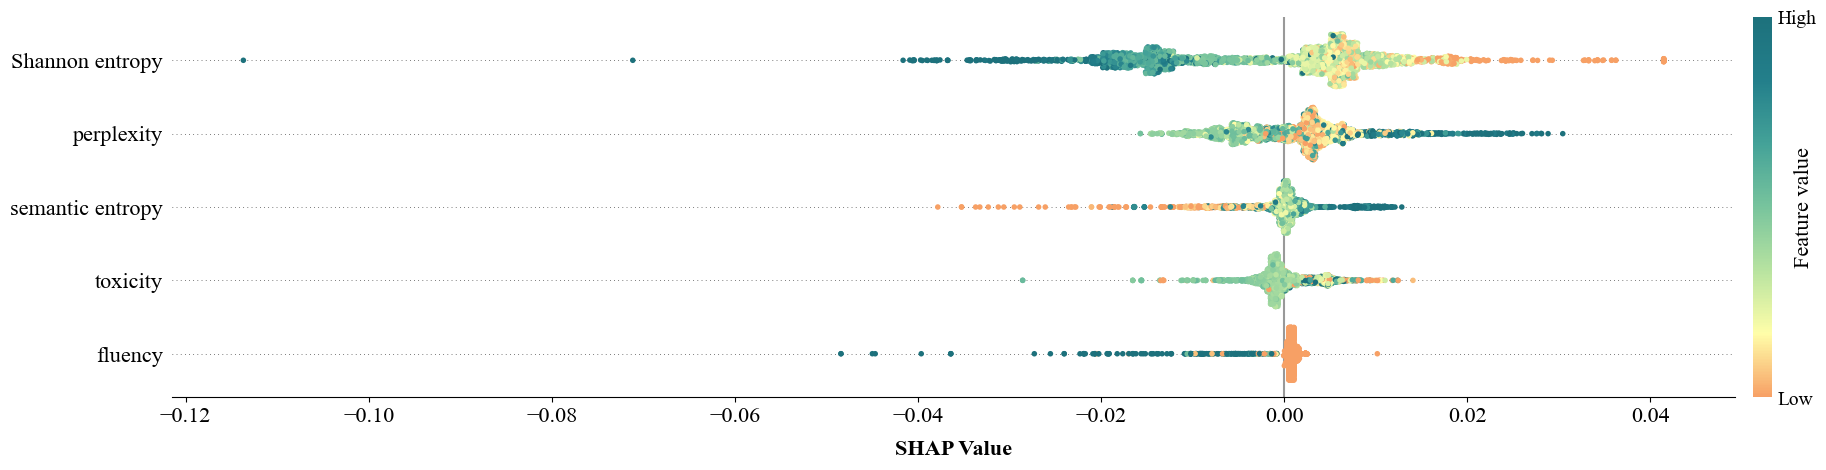

In [6]:
alpha = 1
max_display = 7
shap_exp = shap_values
shap_values = shap_exp.values
features = shap_exp.data
axis_color="#333333"
feature_names = ['fluency', 'toxicity', 'Shannon entropy', 'perplexity', 'semantic entropy']
color = [0, 0.54337757, 0.98337906]
feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))
plot_size=(24, 6*0.618)
row_height = 0.4
if plot_size == "auto":
    pl.gcf().set_size_inches(8, len(feature_order) * row_height + 1.5)
elif type(plot_size) in (list, tuple):
    pl.gcf().set_size_inches(plot_size[0], plot_size[1])
elif plot_size is not None:
    pl.gcf().set_size_inches(8, len(feature_order) * plot_size + 1.5)

clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298","#237f8b","#1D717C"]
newcmp = LinearSegmentedColormap.from_list('chaos', clist)
fig, ax_heatmap = pl.subplots(figsize=(24, 8 * 0.618))
pl.axvline(x=0, color="#999999", zorder=-1) # 竖直参考线

for pos, i in enumerate(feature_order):
        pl.axhline(y=pos, color="#000000", lw=0.5, dashes=(1, 5), zorder=-1) # 水平参考线
        shaps = shap_values[:, i]
        values = None if features is None else features[:, i]
        inds = np.arange(len(shaps))
        np.random.shuffle(inds)
        if values is not None:
            values = values[inds]
        shaps = shaps[inds]
        colored_feature = True
        N = len(shaps)
        nbins = 100
        quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
        inds = np.argsort(quant + np.random.randn(N) * 1e-6)
        layer = 0
        last_bin = -1
        ys = np.zeros(N)
        for ind in inds:
            if quant[ind] != last_bin:
                layer = 0
            ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
            layer += 1
            last_bin = quant[ind]
        ys *= 0.9 * (row_height / np.max(ys + 1))

        if features is not None and colored_feature:
            # trim the color range, but prevent the color range from collapsing
            vmin = np.nanpercentile(values, 5)
            vmax = np.nanpercentile(values, 95)
            if vmin == vmax:
                vmin = np.nanpercentile(values, 1)
                vmax = np.nanpercentile(values, 99)
                if vmin == vmax:
                    vmin = np.min(values)
                    vmax = np.max(values)
            if vmin > vmax: # fixes rare numerical precision issues
                vmin = vmax

            assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

            # plot the nan values in the interaction feature as grey
            nan_mask = np.isnan(values)
            pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777",
                        s=16, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)

            # plot the non-nan values colored by the trimmed feature value
            cvals = values[np.invert(nan_mask)].astype(np.float64)
            cvals_imp = cvals.copy()
            cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
            cvals[cvals_imp > vmax] = vmax
            cvals[cvals_imp < vmin] = vmin
            pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                        cmap=newcmp, vmin=vmin, vmax=vmax, s=16,
                        c=cvals, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)
            
import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=newcmp)
m.set_array([0, 1])
cb = pl.colorbar(m, ax=pl.gca(), pad=0.01, aspect=20)
cb.set_ticks([0, 1])
cb.set_ticklabels(['Low', 'High'])
cb.set_label("Feature value", labelpad=-16, size=16)
cb.ax.tick_params(labelsize=14, length=0)
cb.set_alpha(1)
cb.outline.set_visible(False)

pl.xlabel("SHAP Value", fontsize=16, fontweight='bold', fontname='Times New Roman', labelpad=10)

pl.gca().xaxis.set_ticks_position('bottom')
pl.gca().yaxis.set_ticks_position('none')
pl.gca().spines['right'].set_visible(False)
pl.gca().spines['top'].set_visible(False)
pl.gca().spines['left'].set_visible(False)
# pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
pl.yticks(range(len(feature_order)), [feature_names[i] for i in feature_order])
pl.setp(ax_heatmap.get_yticklabels(), rotation=0, fontsize=16, fontweight='normal', fontname='Times New Roman')
pl.setp(ax_heatmap.get_xticklabels(), rotation=0, fontsize=16, fontweight='normal', fontname='Times New Roman')

# 保存图片到本地，设置 dpi 为 300
pl.savefig('./plot_2_400dpi.jpg', dpi=400, bbox_inches='tight')
# plt.savefig('./plot_2_300dpi.png', bbox_inches='tight', dpi=300)
# plt.savefig('./plot_2_300dpi.tiff', bbox_inches='tight', dpi=300)
# plt.savefig('./plot_2_300dpi.svg', bbox_inches='tight', dpi=300)

# 显示图像
pl.show()

## 图c

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import shap
plt.rcParams['font.family'] = 'Times New Roman'

cols = [2, 3, 4, 5, 6, 7]
cols_name = ['semantic similarity', 'fluency', 'toxicity', 'Shannon entropy', 'perplexity','semantic entropy']
df = pd.read_excel("jfleg_data_all.xlsx", usecols=cols)

# 提取 'semantic_similarity' 列
semantic_similarity = df[['semantic similarity']]

# 对其他列进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.drop(columns=['semantic similarity']))
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[:-1])  # 除去 'semantic_similarity' 后的列名

# 将 'semantic_similarity' 列合并回去
df_scaled = pd.concat([semantic_similarity.reset_index(drop=True), df_scaled], axis=1)

# 选择所需列
df = df_scaled[cols_name]
df.head()

,semantic similarity,fluency,toxicity,Shannon entropy,perplexity,semantic entropy
0,0.858572,0.598343,0.016714,0.723976,0.373239,0.665820
1,0.980463,0.342702,0.014098,0.758437,0.506295,0.510259
2,0.877219,0.348808,0.016663,0.858522,0.671426,0.705733
3,0.980056,0.346681,0.016714,0.773507,0.585065,0.539826
4,0.959815,0.346681,0.016714,0.778501,0.480598,0.548796


In [8]:
# 选择特征
cols = ['fluency', 'toxicity', 'Shannon entropy', 'perplexity','semantic entropy']
# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=150)
model.fit(df[cols], df['semantic similarity'].values)
# 引用package并且获得解释器explainer
explainer = shap.Explainer(model)
# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer(df[cols])
# print(shap_values.shape)
# print(df[cols])
# 可以确认基线值就是训练集的目标变量的拟合值的均值。
y_base = explainer.expected_value
# print(y_base)
df['pred'] = model.predict(df[cols])
# print(data['pred'].mean())

# 绘制 SHAP 力图时保留三位小数
shap_values.values = np.round(shap_values.values, 4)
shap_values.base_values = np.round(shap_values.base_values, 4)
shap_values.data = np.round(shap_values.data, 4)

# 色系一
clist = ["#45978B","#E08648"]
# force_plot++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# 随机选择 100 个样本的索引
random_indices = np.random.choice(len(shap_values), size=len(shap_values), replace=False)
# 提取对应样本的 SHAP 值并计算平均值
mean_shap_values = shap_values[random_indices].mean(axis=0)

shap.plots.force(mean_shap_values, matplotlib=True, show=False, plot_cmap=clist, figsize=(24, 3*0.618))\
        .savefig('./force_400dpi.jpg', bbox_inches='tight', dpi=400, pad_inches=0)

[12:37:03] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [9]:
cols = [2, 3, 4, 5, 6, 7]
cols_name = ['semantic similarity', 'Shannon entropy', 'perplexity', 'semantic entropy', 'fluency', 'toxicity']
df = pd.read_excel("jfleg_data_all.xlsx", usecols=cols) 

# 使用 StandardScaler 对数据进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

df = df[cols_name]
df.head()

,semantic similarity,Shannon entropy,perplexity,semantic entropy,fluency,toxicity
0,0.490278,0.723976,0.373239,0.665820,0.598343,0.016714
1,0.929585,0.758437,0.506295,0.510259,0.342702,0.014098
2,0.557484,0.858522,0.671426,0.705733,0.348808,0.016663
3,0.928118,0.773507,0.585065,0.539826,0.346681,0.016714
4,0.855170,0.778501,0.480598,0.548796,0.346681,0.016714


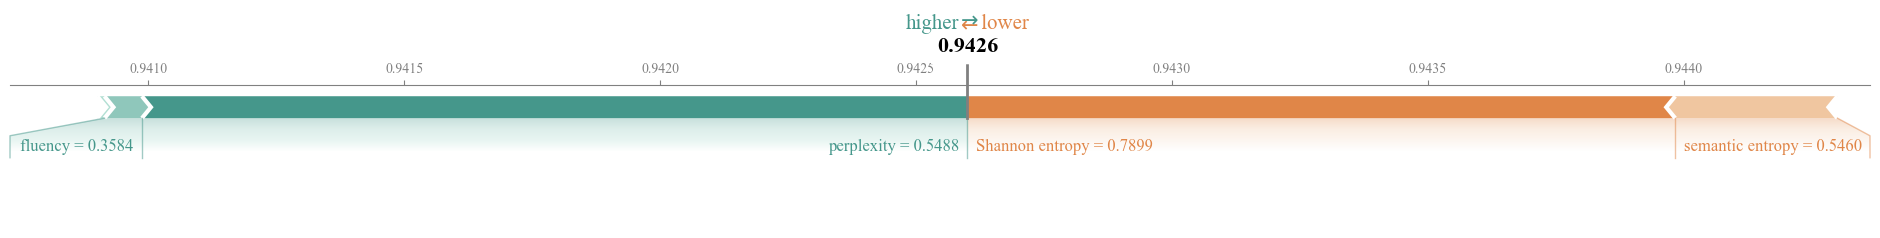

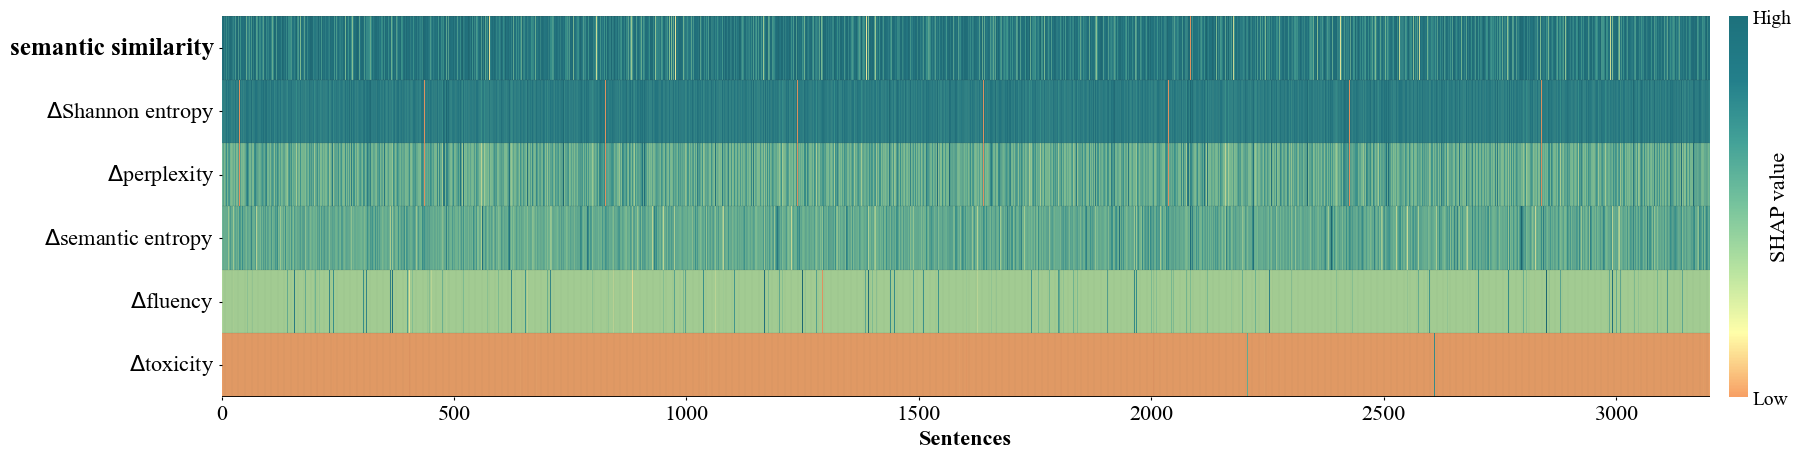

In [10]:
all_data = df.values.T

clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298","#237f8b","#1D717C"]
newcmp = LinearSegmentedColormap.from_list('chaos', clist)

plt.figure(figsize=(24, 8*0.618))
# plt.rcParams.update({'font.family': 'Times New Roman'})
ax_heatmap = sns.heatmap(all_data, 
                         cmap=newcmp, 
                         linewidths=0, 
                         linecolor='gray'
                         )  # 颜色条的大小)

# # 设置色条的位置
cbar = ax_heatmap.collections[0].colorbar
cbar.ax.set_position([0.753, 0.11, 0.02, 0.77])  # 根据需要调整数值以确定位置

vmin = all_data.min()
vmax = all_data.max()

cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['Low', 'High'], size=14)  # 根据需要调整标签
cbar.ax.tick_params(size=0)
cbar.set_label("SHAP value", labelpad=-16, size=16)

# 设置纵坐标 y轴 刻度标签
yticklabels = df.columns
yticklabels = [r'$\Delta$' + label for label in yticklabels]
yticklabels[0] = df.columns[0]
ax_heatmap.set_yticklabels(yticklabels, rotation=0, size=16, fontweight='normal')
# 获取第一个标签的文本对象
label_text = ax_heatmap.get_yticklabels()[0]
# 设置第一个标签的字体样式为粗体
label_text.set_weight('bold')
label_text.set_fontsize(18)

# 设置横坐标 x轴 的刻度位置
ax_heatmap.set_xticks(np.arange(0, all_data.shape[1], 500))
ax_heatmap.set_xticklabels(['0', '500', '1000', '1500', '2000', '2500', '3000'], rotation=0, size=16)

# 绘制横坐标x轴的黑色坐标轴线
ax_heatmap.axhline(y=all_data.shape[0], color='black', linewidth=2)
ax_heatmap.axhline(y=0, color='#363636', linewidth=0.18)

ax_heatmap.set_xlabel('Sentences', size=16, fontdict={'weight': 'bold'})

# 加格子外框
def highlight_cell(x, y, ax=None, **kwargs):
    rect = plt.Rectangle((x, y), 1, 1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect
for i in range(1, all_data.shape[1]):
    for j in range(0, all_data.shape[0]+1):
        highlight_cell(i, j, color="#363636", linewidth=0.03)

# 刻度点
ax_heatmap.tick_params(axis="x", bottom=True, length=2)
ax_heatmap.tick_params(axis="y", left=True, length=2)

plt.savefig('./plot_3_400dpi.jpg', bbox_inches='tight', dpi=400, pad_inches=0)
# plt.savefig('./plot_3_400dpi.png', bbox_inches='tight', dpi=400)
# plt.savefig('./plot_3_400dpi.tiff', bbox_inches='tight', dpi=400)
# plt.savefig('./plot_3_400dpi.svg', bbox_inches='tight', dpi=400)

plt.show()

## 合并子图

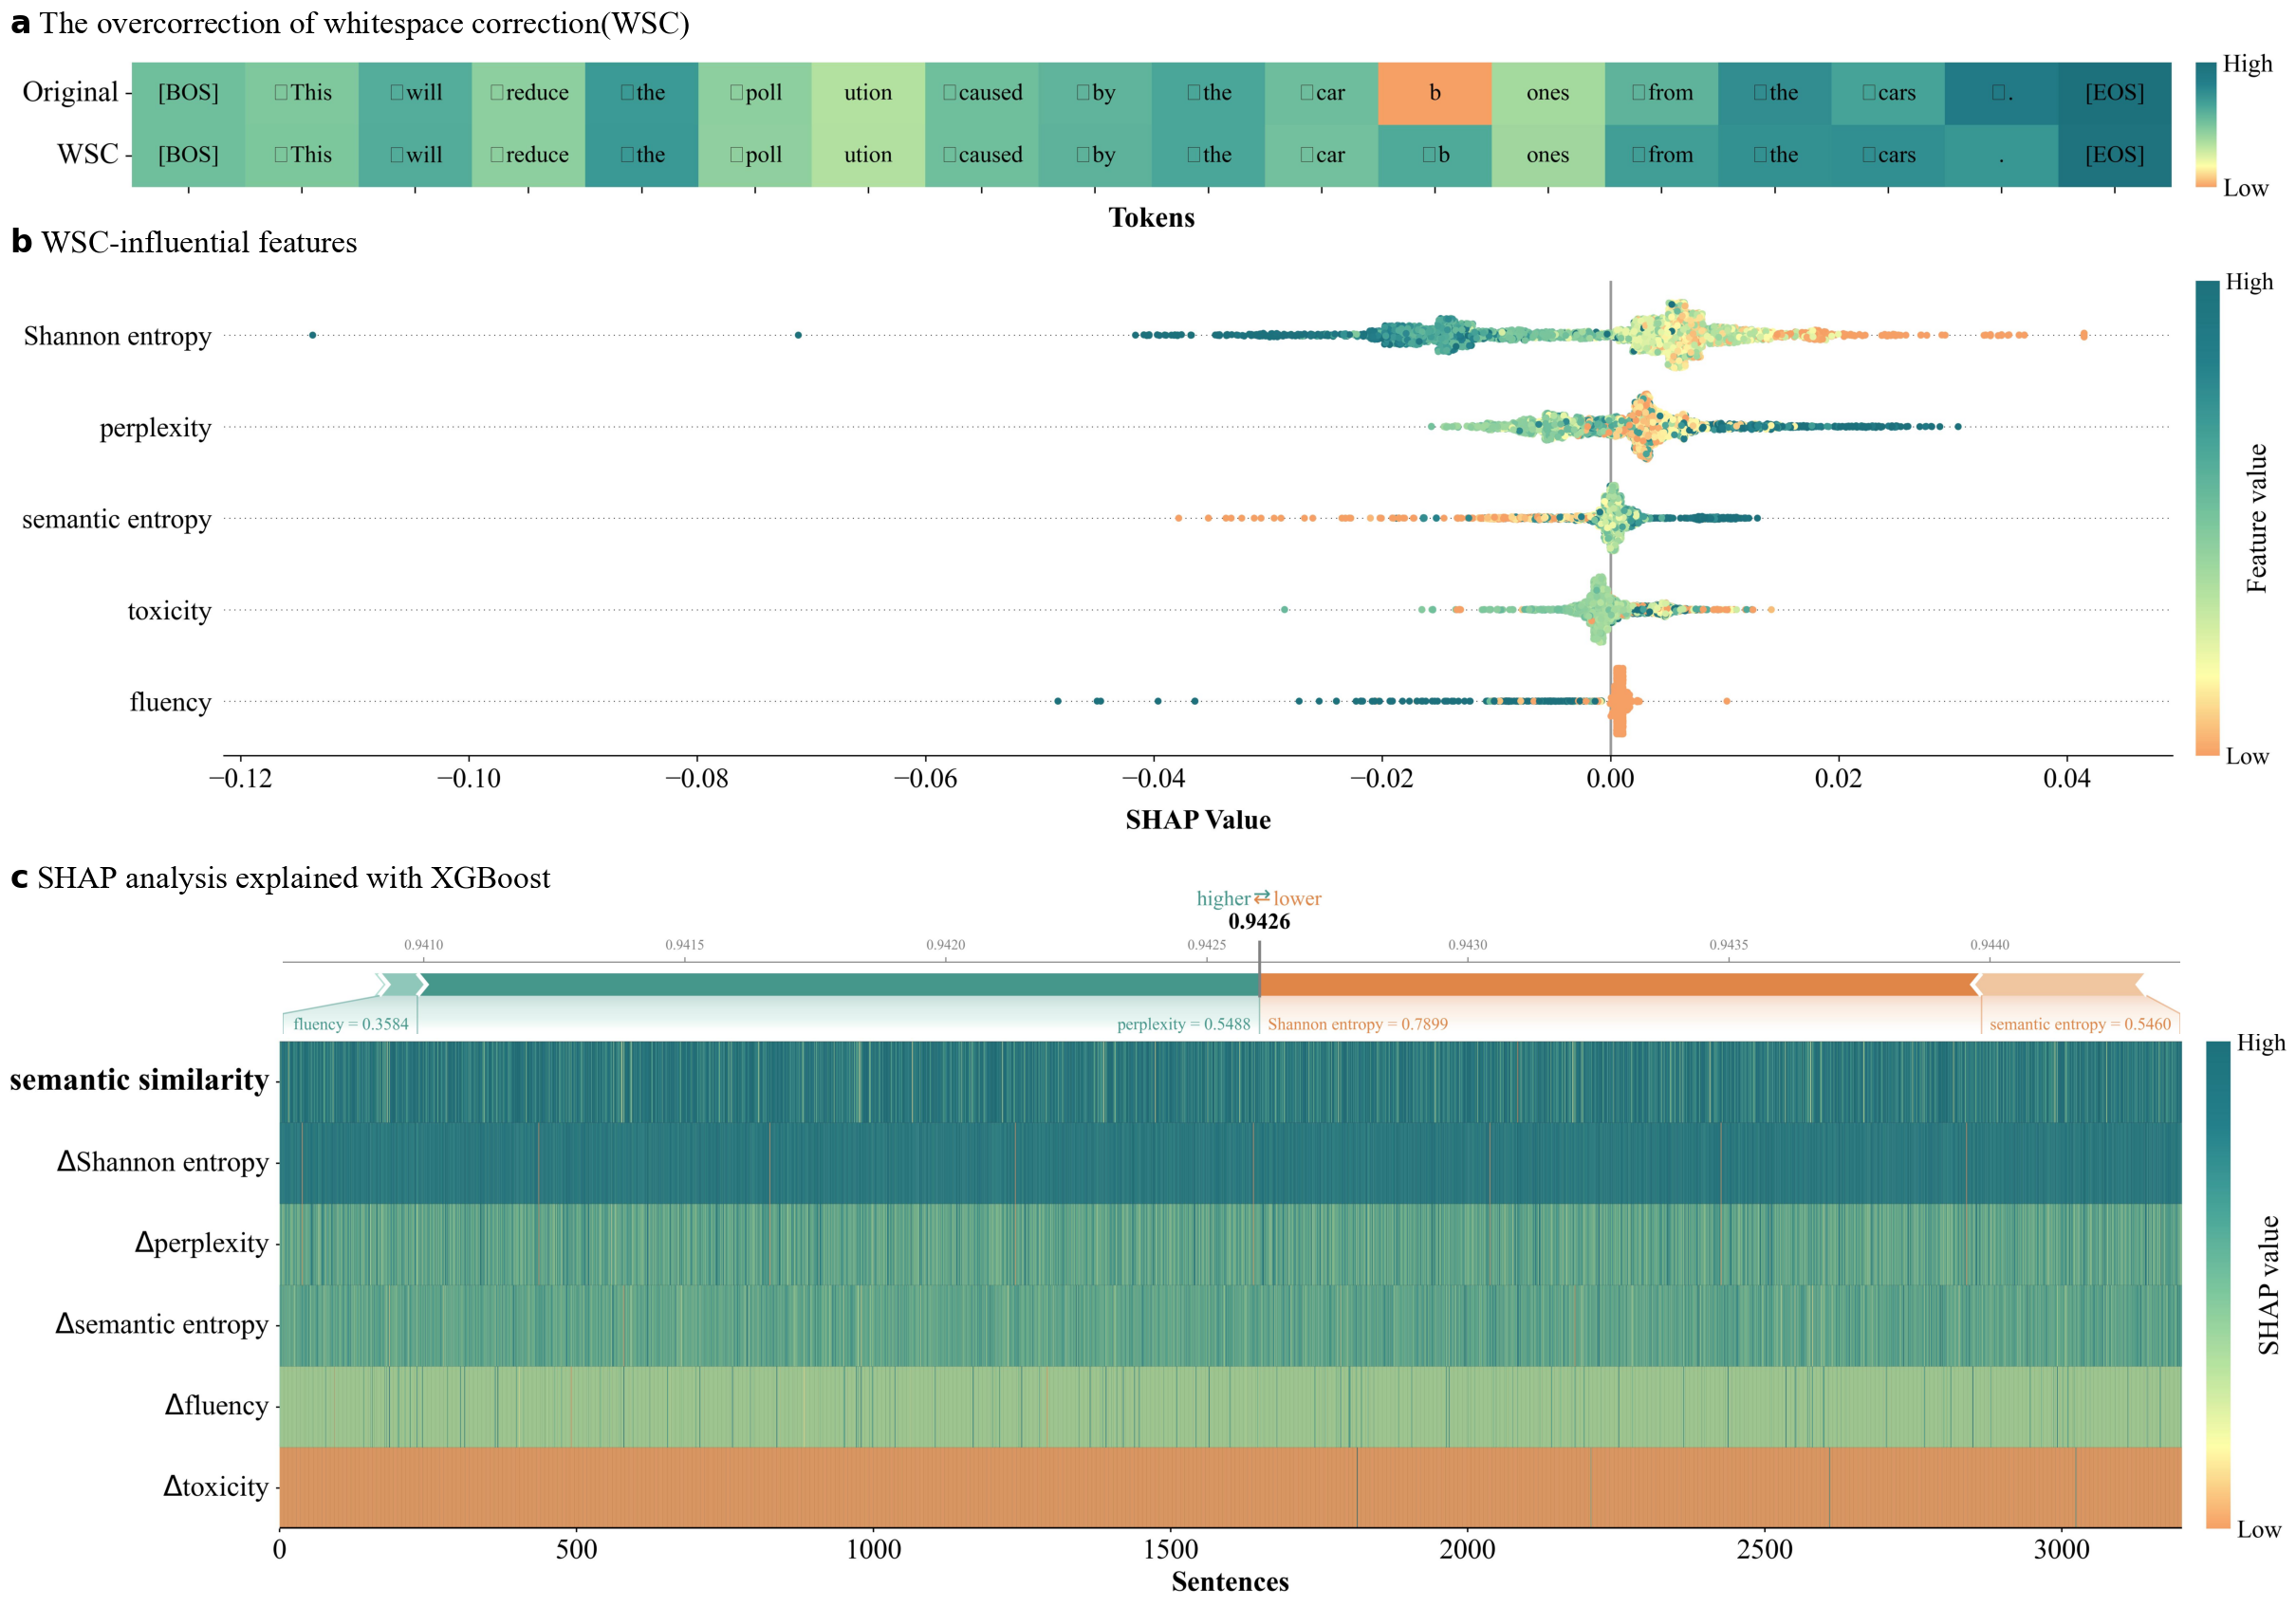

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
plt.rcParams['font.family'] = 'Times New Roman'

# 加载已保存的图像
img1 = mpimg.imread("plot_1_400dpi.jpg")
img2 = mpimg.imread("plot_2_400dpi.jpg")
img3 = mpimg.imread("force_400dpi.jpg")
img4 = mpimg.imread("plot_3_400dpi.jpg")

# 创建一个 GridSpec 布局
fig = plt.figure(figsize=(24, 36))  # 控制整体图形大小
gs = GridSpec(4, 1, height_ratios=[1, 1, 0.5, 1])  # 4 行 1 列，调整垂直间距

# 第一张图
ax1 = fig.add_subplot(gs[0, 0])  # 第 1 行
ax1.imshow(img1)
ax1.axis("off")
ax1.set_title(r"$\bf{a}$ The overcorrection of whitespace correction(WSC)", loc='left', fontsize=24)  # 设置标题

# 第二张图
ax2 = fig.add_subplot(gs[1, 0])  # 第 2 行
ax2.imshow(img2)
ax2.axis("off")
ax2.set_title(r"$\bf{b}$ WSC-influential features", loc='left', fontsize=24)  # 设置标题

# 第三张图
ax3 = fig.add_subplot(gs[2, 0])  # 第 3 行
ax3.imshow(img3)
ax3.axis("off")

# 第四张图
ax4 = fig.add_subplot(gs[3, 0])  # 第 4 行
ax4.imshow(img4)
ax4.axis("off")

# 调整子图位置和大小以减少间距
ax1.set_position([0, 1, 1, 1])
ax2.set_position([0, 0.88, 1, 1])
ax3.set_position([0.12, 0.75, 0.833, 1])
ax4.set_position([0, 0.657, 1, 1])

fig.text(0, 1.282, r"$\bf{c}$ SHAP analysis explained with XGBoost", fontsize=24)

plt.savefig('./plot_4_400dpi.jpg', bbox_inches='tight', dpi=400)
# plt.savefig('./plot_4_400dpi.png', bbox_inches='tight', dpi=400)
# plt.savefig('./plot_4_400dpi.tiff', bbox_inches='tight', dpi=400)
plt.savefig('./plot_4_400dpi.svg', bbox_inches='tight', dpi=400)

plt.show()
